# Mordern Applyed Statistics(Chap 11)

### import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 11.1 Visualization methods

### 1) Principal Component analysis

- **Principal Component for the iris data.**

In [2]:
## Iris
from sklearn.datasets import load_iris
iris = load_iris()
ir = pd.DataFrame(data=iris.data, columns=iris.feature_names)
ir_target = iris.target
ir_target_name = iris.target_names

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 평균과 표준편차를 이용한 기본 스케일
std = StandardScaler().fit_transform(np.log(ir))

## PCA
pca = PCA()
ir_pca = pca.fit_transform(std)

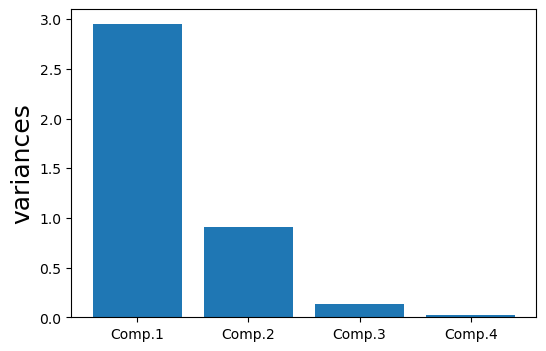

In [4]:
# PCA component에 대한 bar chart
plt.figure(figsize=(6,4))

plt.bar(['Comp.1', 'Comp.2', 'Comp.3', 'Comp.4'], pca.explained_variance_)
plt.ylabel('variances', fontsize = 18)
plt.show()

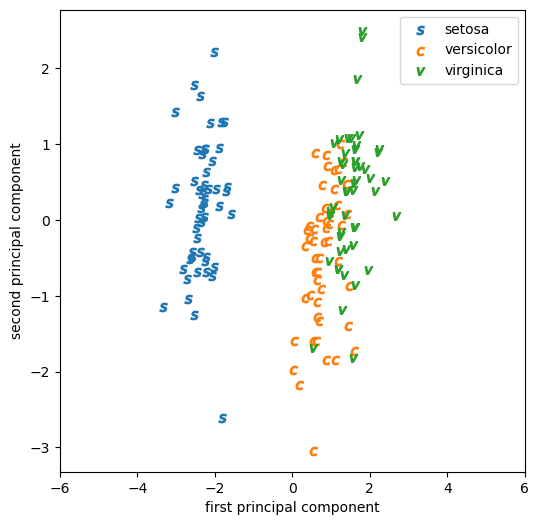

In [5]:
## PCA
pca = PCA(n_components=2)
ir_pca = pca.fit_transform(std)
pca_columns=['Comp1','Comp2']
ir_pca_df = pd.DataFrame(-ir_pca, columns=pca_columns)

## 2개의 component를 이용한 Scatter plot 
plt.figure(figsize=(6,6))

markers=['$s$', '$c$', '$v$']
for i, marker in enumerate(markers):
    x_axis_data = ir_pca_df.loc[ir_target==i,:]['Comp1']
    y_axis_data = ir_pca_df.loc[ir_target==i,:]['Comp2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=ir_target_name[i])

plt.legend(loc='upper right')
plt.xlabel('first principal component')
plt.xlim(-6, 6)
plt.ylabel('second principal component')
plt.show()

- **Principal Component for the crabs data.**

In [6]:
## Crabs data
crabs = pd.read_csv("../data/crabs.csv")
lcrabs = np.log(crabs.iloc[:,3:])
lcrabs_target = np.repeat([0,1,2,3], [50]*4, axis = 0)
lcrabs_target_name = np.array(["B","b","O","o"])

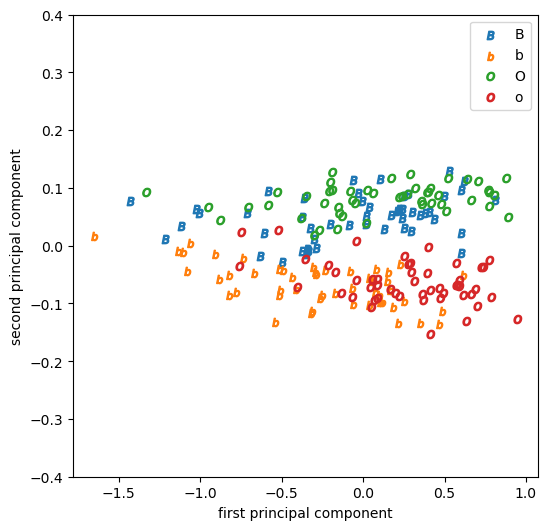

In [7]:
## PCA
pca = PCA(n_components=2)
lcrabs_pca = pca.fit_transform(lcrabs)
pca_columns=['Comp1','Comp2']
lcrabs_pca_df = pd.DataFrame(-lcrabs_pca, columns=pca_columns)

## 2개의 component를 이용한 Scatter plot 
plt.figure(figsize=(6,6))

markers=['$B$', '$b$', '$O$', '$o$']
for i, marker in enumerate(markers):
    x_axis_data = lcrabs_pca_df.loc[lcrabs_target==i,:]['Comp1']
    y_axis_data = lcrabs_pca_df.loc[lcrabs_target==i,:]['Comp2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=lcrabs_target_name[i])

plt.legend(loc='upper right')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.ylim(-0.4,0.4)
plt.show()

### 2) Distance methods

- **Distance-based representations of the iris data**

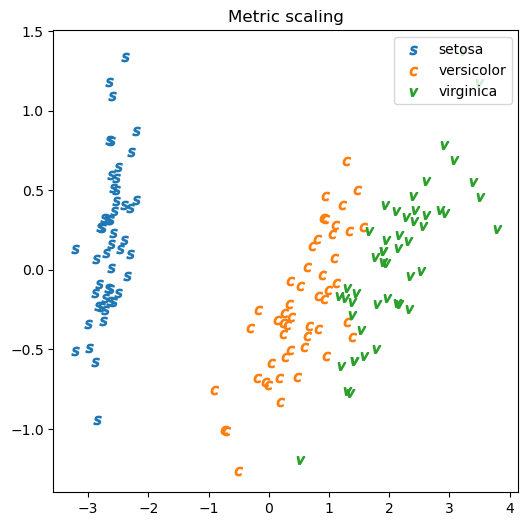

In [8]:
from cmdscale import cmdscale
from scipy.spatial.distance import cdist

## Metric scaling mapping of iris data
y, evals = cmdscale(cdist(ir, ir, 'euclidean'))
columns=['x','y']
ir_cmd_df = pd.DataFrame(y[:,0:2], columns=columns)

## 2개의 component를 이용한 Scatter plot 
plt.figure(figsize=(6,6))

markers=['$s$', '$c$', '$v$']
for i, marker in enumerate(markers):
    x_axis_data = ir_cmd_df.loc[ir_target==i,:]['x']
    y_axis_data = ir_cmd_df.loc[ir_target==i,:]['y']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=ir_target_name[i])

plt.legend(loc='upper right')
plt.title('Metric scaling')
plt.show()

TolFun exceeded: Optimisation terminated


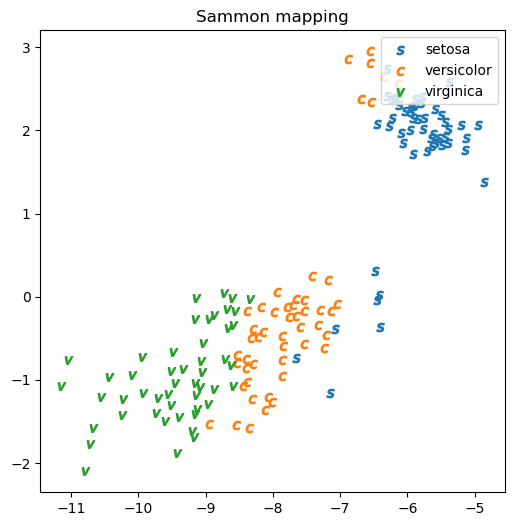

In [9]:
from sammon import sammon
(x,index) = np.unique(iris.data,axis=0,return_index=True)

## Sammon mapping of iris data
y, E = sammon(x, n = 2)
y[:,1] = y[:,1]
columns=['x','y']
ir_sammon_df = pd.DataFrame(y, columns=columns)

## 2개의 component를 이용한 Scatter plot 
plt.figure(figsize=(6,6))

markers=['$s$', '$c$', '$v$']
for i, marker in enumerate(markers):
    x_axis_data = ir_sammon_df.loc[np.delete(ir_target, 142)==i,:]['x']
    y_axis_data = ir_sammon_df.loc[np.delete(ir_target, 142)==i,:]['y']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=ir_target_name[i])

plt.legend(loc='upper right')
plt.title('Sammon mapping')
plt.show()

Unable to determine R home: [WinError 2] 지정된 파일을 찾을 수 없습니다


initial  value 3.024856 
iter   5 value 2.638471
final  value 2.579979 
converged


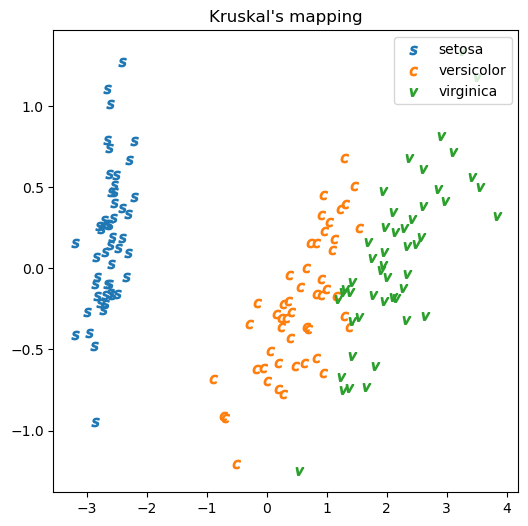

In [10]:
from rpy2.robjects import r

## Kruskal's mapping of iris data
r('library(MASS)')
r('ir <- rbind(iris3[,,1], iris3[,,2], iris3[,,3])')
r('ir.iso <- isoMDS(dist(ir[-143,]))')
ir_iso = r('ir.iso$points')

ir_iso_df = pd.DataFrame({'x':ir_iso[:149], 'y':ir_iso[149:]})

## 2개의 component를 이용한 Scatter plot 
plt.figure(figsize=(6,6))

markers=['$s$', '$c$', '$v$']
for i, marker in enumerate(markers):
    x_axis_data = ir_iso_df.loc[np.delete(ir_target, 142)==i,:]['x']
    y_axis_data = ir_iso_df.loc[np.delete(ir_target, 142)==i,:]['y']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=ir_target_name[i])

plt.legend(loc='upper right')
plt.title("Kruskal's mapping")
plt.show()

- **Sammon mapping of crabs data**

TolFun exceeded: Optimisation terminated


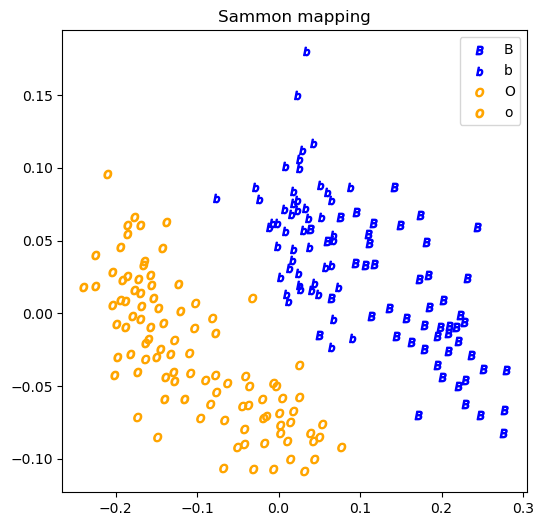

In [11]:
## Sammon mapping of crabs data
cr_scale = 0.5 * np.log(crabs['CL'] * crabs['CW'])
slcrabs = lcrabs - pd.DataFrame(np.array([cr_scale]*5), index = lcrabs.columns).transpose()
cr_means = np.zeros((2, 5))
cr_means[0,:] = slcrabs[crabs['sex'] == 'F'].mean(axis = 0)
cr_means[1,:] = slcrabs[crabs['sex'] == 'M'].mean(axis = 0)
dslcrabs = slcrabs - cr_means[np.repeat([0,1], [100,100], axis = 0),]

y, E = sammon(dslcrabs, n = 2)
y[:,1] = y[:,1]
mds_columns=['x','y']
lcrabs_sammon_df = pd.DataFrame(y, columns=mds_columns)

## 2개의 component를 이용한 Scatter plot 
plt.figure(figsize=(6,6))

markers=['$B$', '$b$', '$O$', '$o$']
for i, marker in enumerate(markers):
    x_axis_data = lcrabs_sammon_df.loc[lcrabs_target==i,:]['x']
    y_axis_data = lcrabs_sammon_df.loc[lcrabs_target==i,:]['y']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=lcrabs_target_name[i], color='blue' if marker in ['$B$', '$b$']  else 'orange')

plt.legend(loc='upper right')
plt.title('Sammon mapping')
plt.show()

- **Isotonic multidimensional scaling representation of the fgl data**

initial  value 11.518169 
iter   5 value 6.353547
iter  10 value 5.993823
iter  15 value 5.913937
final  value 5.888284 
converged


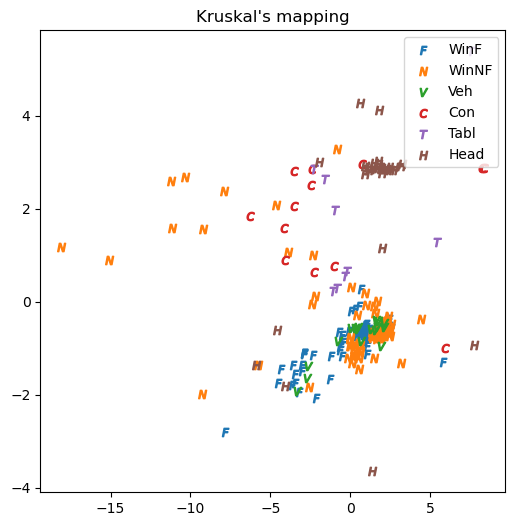

In [12]:
## Kruskal's mapping of fgl data
r('library(MASS)')
r('fgl.iso <- isoMDS(dist(as.matrix(fgl[-40, -10])))')
fgl_iso = r('fgl.iso$points')
fgl_target = r('as.numeric(fgl$type)-1')
fgl_target_name = r('levels(fgl$type)')

fgl_iso_df = pd.DataFrame({'x':fgl_iso[:213],'y':fgl_iso[213:]})

## 2개의 component를 이용한 Scatter plot 
plt.figure(figsize=(6,6))

markers=['$F$', '$N$', '$V$', '$C$', '$T$', '$H$']
for i, marker in enumerate(markers):
    x_axis_data = fgl_iso_df.loc[np.delete(fgl_target, 39)==i,:]['x']
    y_axis_data = fgl_iso_df.loc[np.delete(fgl_target, 39)==i,:]['y']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=fgl_target_name[i])

plt.legend(loc='upper right')
plt.title("Kruskal's mapping")
plt.show()

### 3) Self-Organizing maps

In [13]:
# R에서 self-organizing maps 를 그려주는 패키지가 Python에는 없으므로 생략

### 4) Biplots

- **Principal component biplot of the part of the state.x77 data**

In [14]:
## State.x77 data
state = pd.read_csv("../data/state.x77.csv").iloc[:,1:7]
state.index = r('state.abb')

<Figure size 600x600 with 0 Axes>

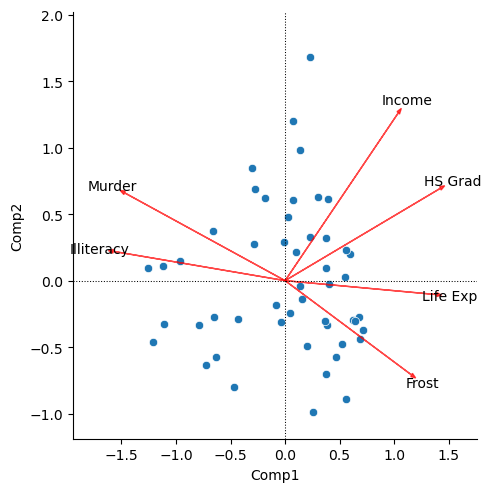

In [15]:
from biplot import eigen_scaling, biplot
from statsmodels.multivariate.pca import PCA

## swiss.x77 데이터에 대한 PC Biplot
plt.figure(figsize=(6,6))
state_pca = PCA(data = state, standardize = True, normalize = True, ncomp = 2)
biplot(pca = state_pca, scaling = 2, plot_loading_labels = True)

### 5) Independent component analysis

- **Boxplots of four ’signals’ recovered by ICA from the crabs data**

<Figure size 1500x800 with 0 Axes>

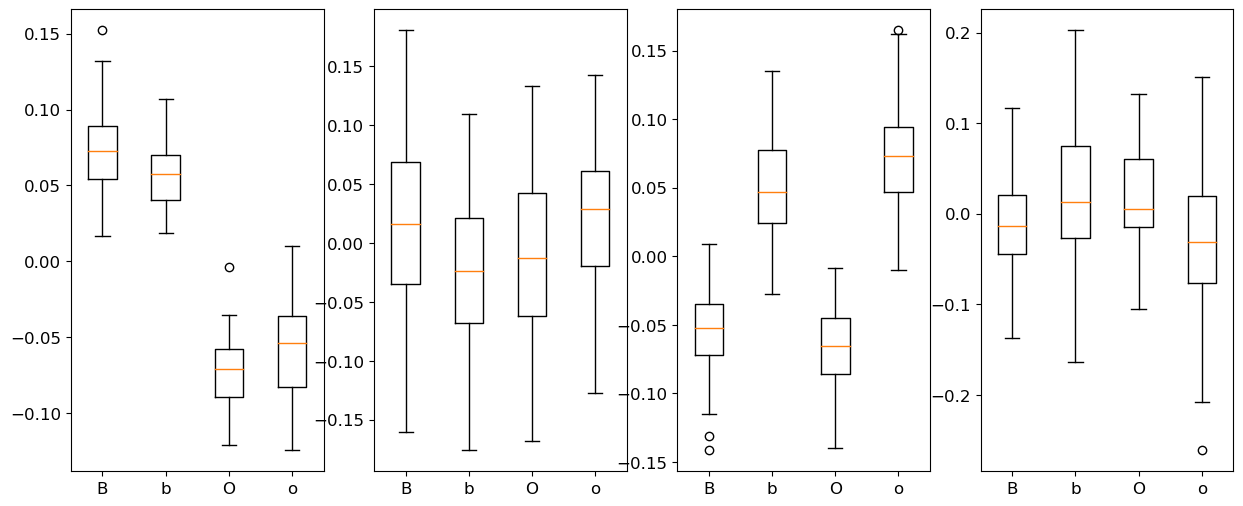

In [16]:
from sklearn.decomposition import FastICA

## ICA from crabs data
ica = FastICA(n_components=4)
crabs_ica = ica.fit_transform(crabs.iloc[:,3:8])

## 각 component별 box plot
plt.figure(figsize=(15,8))
plt.style.use('default')
plt.rcParams['font.size'] = 12
fig,ax=plt.subplots(nrows=1,ncols=4, figsize=(15, 6))

for i in range(4):    
    crabs_ica_df = pd.DataFrame({'B' : crabs_ica[0:50,i],
                                 'b' : crabs_ica[50:100,i],
                                 'O' : crabs_ica[100:150,i],
                                 'o' : crabs_ica[150:200,i]})
    
    ax[i].boxplot(crabs_ica_df)
    ax[i].set_xticklabels(["B","b","O","o"])
    
plt.show()

### 6) Glyph representations

- **stars plot of the state.x77 dataset**

(-0.5, 1499.5, 1199.5, -0.5)

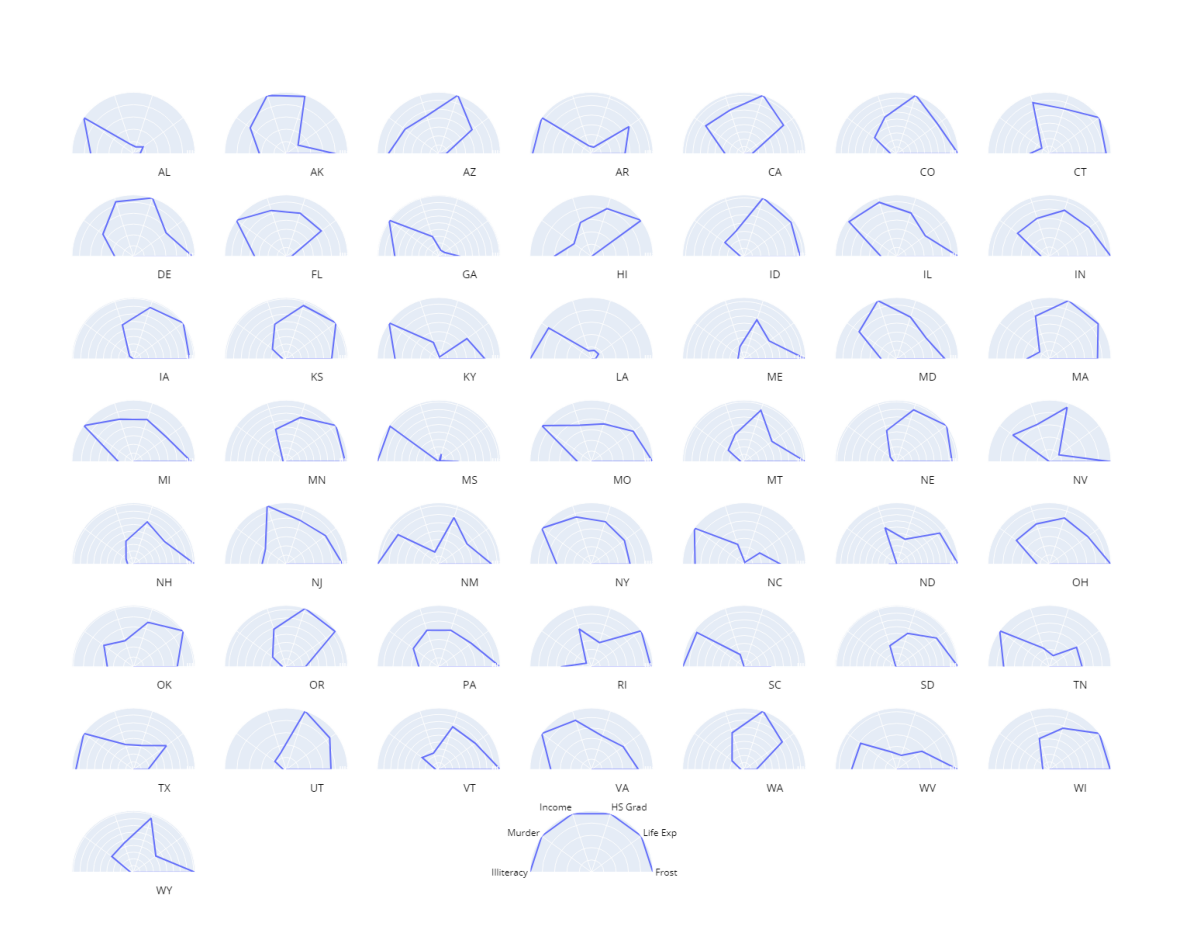

In [17]:
# pip install -U kaleido
# pip install plotly
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from plotly.subplots import make_subplots
import PIL.Image as pilimg

state_scale = MinMaxScaler().fit_transform(state.iloc[:,[1,3,0,4,2,5]])
state_scale = np.concatenate((state_scale,np.zeros([50,4])), axis = 1)

plt_vars = list(state.iloc[:,[1,3,0,4,2,5]].columns) + ['0','1','2','3']

fig = make_subplots(rows=8, cols=7, shared_xaxes=False, specs=[[{'type':'polar'}]*7]*8, )

figures = []
for i, index in enumerate(state.index):
    figures.append(px.line_polar(state_scale, r = pd.Series(state_scale[i,]),
                                 range_theta=[0,180], start_angle=180,
                                 theta=plt_vars, line_close=True, width = 200, title = index))

for i, figure in enumerate(figures):
    fig.append_trace(figure["data"][0], row=i//7+1, col=i%7+1)

fig.update_layout(height=1200, width=1500)
fig.update_polars(angularaxis={'direction': 'clockwise', 'rotation': -180, 'color':'white'}, sector=[0, 180], radialaxis={'title':{'font':{'color':'black'}}, 'color':'white'})


fig_temp = px.line_polar(state_scale, r = pd.Series([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
                         range_theta=[0,180], start_angle=180,
                         theta=plt_vars, line_close=True, width = 200)
fig.append_trace(fig_temp["data"][0], row=8, col=4)
fig['layout']['polar53']['angularaxis']['color'] = 'black'
for i in range(50):
    fig['layout'][fig['data'][i]['subplot']]['radialaxis']['title']['text'] = state.index[i]
    
fig.write_image('../img/python_stars_plot_state_x77.png')
image = pilimg.open('../img/python_stars_plot_state_x77.png')
plt.figure(figsize=(15,15))
plt.imshow(np.array(image))
plt.axis('off')

### 7) Parallel coordinate plots

- **Parallel coordinates plots of the state.x77 dataset**

(-0.5, 699.5, 499.5, -0.5)

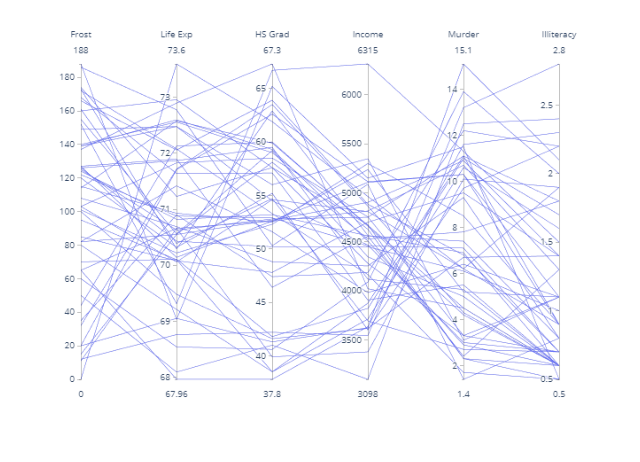

In [18]:
import plotly.express as px
fig = px.parallel_coordinates(state.iloc[:,[5,2,4,0,3,1]], # color = ['black']*50,
                              dimensions=list(state.iloc[:,[5,2,4,0,3,1]].columns))

fig.write_image('../img/python_parallel_state_x77.png')
image = pilimg.open('../img/python_parallel_state_x77.png')
plt.figure(figsize=(8,8))
plt.imshow(np.array(image))
plt.axis('off')

- **Parallel coordinates plots of the log-transforrned iris data**

(-0.5, 699.5, 499.5, -0.5)

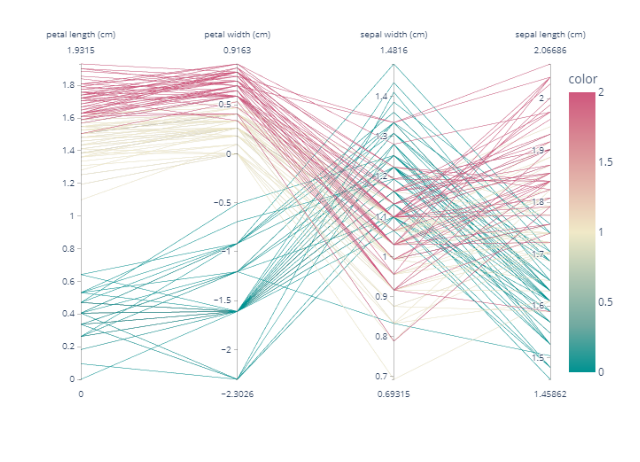

In [19]:
fig = px.parallel_coordinates(np.log(ir).iloc[:,[2,3,1,0]], color = np.array(range(0,150)) // 50,
                              dimensions=list(ir.iloc[:,[2,3,1,0]].columns),
                              color_continuous_scale=px.colors.diverging.Tealrose)

fig.write_image('../img/python_parallel_iris.png')
image = pilimg.open('../img/python_parallel_iris.png')
plt.figure(figsize=(8,8))
plt.imshow(np.array(image))
plt.axis('off')

## 11.2 Cluster Analysis

- **Dendograms for the socio-economic data on Swiss provinces by single-link clustering**

In [20]:
## Swiss data
swiss_x = pd.read_csv("../data/swiss.csv", index_col=0)

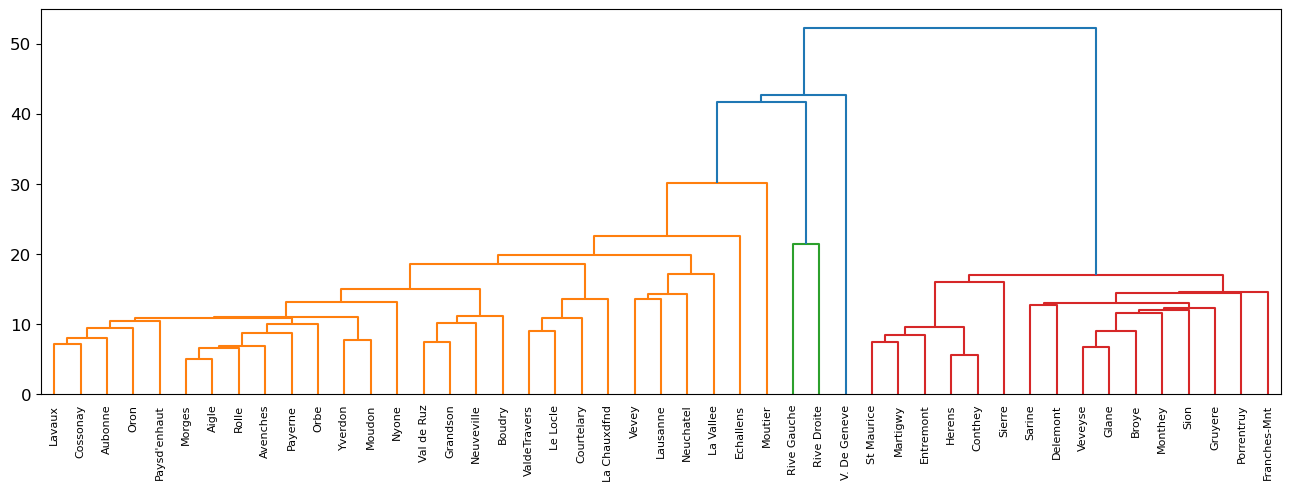

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

## single-link clustering for swiss data
linked = linkage(swiss_x, 'single')

## 클러스터링에 대한 Dendogram
plt.figure(figsize=(16, 5))
dendrogram(linked, orientation='top', labels=swiss_x.index, distance_sort='descending', show_leaf_counts=True)
plt.show()

- **Dendograms for the socio-economic data on Swiss provinces by divisive clustering**

In [22]:
# diana

(나중에)

- **First two principal components for the swiss data and labeling by the groups assigned by K-means**

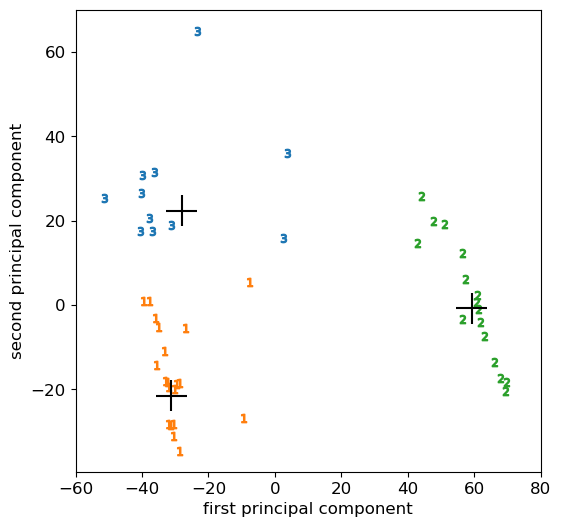

In [23]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## K-Means clustering for swiss data
km = KMeans(n_clusters=3, random_state=0)
km.fit(swiss_x)
centers = km.cluster_centers_
pca=PCA(n_components=2)
swiss_pca = pca.fit_transform(swiss_x)

pca_columns=['Comp1','Comp2']
swiss_pca_df = pd.DataFrame(swiss_pca, columns=pca_columns)

## 2개의 component를 이용한 Scatter plot 
plt.figure(figsize=(6,6))

markers=['$3$', '$1$', '$2$']
for i, marker in enumerate(markers):
    x_axis_data = swiss_pca_df.loc[km.labels_==i,:]['Comp1']
    y_axis_data = swiss_pca_df.loc[km.labels_==i,:]['Comp2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
    
pca_centers = pca.fit_transform(centers)
plt.scatter(pca_centers[:,0], pca_centers[:,1], [500]*3, marker='+',color='black')

plt.xlabel('first principal component')
plt.xlim(-60, 80)
plt.ylabel('second principal component')
plt.show()

- **First two principal components for the swiss data and labeling by the groups assigned by K-Medoids**

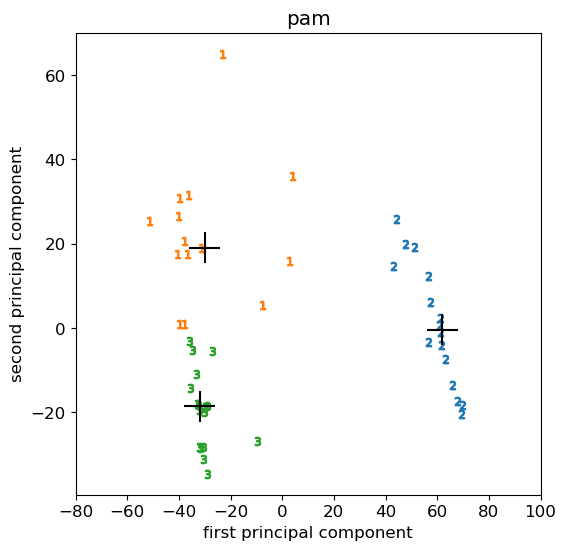

In [24]:
# pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA

## K-Meodids clustering for swiss data
km = KMedoids(n_clusters=3, random_state=0, method='pam')
km.fit(swiss_x)
centers = km.cluster_centers_
pca=PCA(n_components=2)
swiss_pca = pca.fit_transform(swiss_x)

pca_columns=['Comp1','Comp2']
swiss_pca_df = pd.DataFrame(swiss_pca, columns=pca_columns)

## 2개의 component를 이용한 Scatter plot 
plt.figure(figsize=(6,6))

markers=['$2$', '$1$', '$3$']
for i, marker in enumerate(markers):
    x_axis_data = swiss_pca_df.loc[km.labels_==i,:]['Comp1']
    y_axis_data = swiss_pca_df.loc[km.labels_==i,:]['Comp2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
    
pca_centers = pca.fit_transform(centers)
plt.scatter(pca_centers[:,0], pca_centers[:,1], [500]*3, marker='+',color='black')

plt.xlabel('first principal component')
plt.xlim(-80, 100)
plt.ylabel('second principal component')
plt.title('pam')
plt.show()

## 11.3 Factor Analysis

- **Factor analysis for ability.cov data**

In [25]:
## Ability.cov data
ability_cov = pd.read_csv("../data/ability.cov.csv", index_col=0)

In [26]:
## covariance을 correlation으로 변환
def correlation_from_covariance(covariance):
    v = np.sqrt(np.diag(covariance))
    outer_v = np.outer(v, v)
    correlation = covariance / outer_v
    correlation[covariance == 0] = 0
    return correlation

ability_corr = correlation_from_covariance(ability_cov)

# pip install factor-analyzer
from factor_analyzer import FactorAnalyzer, Rotator

## Factor analysis for ability.cov data
fa = FactorAnalyzer(is_corr_matrix=True, rotation='varimax', method='ml', n_factors=2)
fa.fit(ability_corr)

## Summary
print("※ Summary")
print(f' uniqueness : {list(np.round(fa.get_uniquenesses(), 3))}')
print('\n loadings :')
print(f'{np.round(fa.loadings_, 4)}')
print('\n covariance matrix')
print(f'{np.round(fa.loadings_.dot(fa.loadings_.T) + np.diag(fa.get_uniquenesses()), 3)}')

※ Summary
 uniqueness : [0.455, 0.589, 0.218, 0.769, 0.052, 0.334]

 loadings :
[[0.4994 0.5434]
 [0.1561 0.6215]
 [0.2058 0.8599]
 [0.1085 0.4678]
 [0.9562 0.1821]
 [0.7848 0.2248]]

 covariance matrix
[[1.    0.416 0.57  0.308 0.577 0.514]
 [0.416 1.    0.567 0.308 0.262 0.262]
 [0.57  0.567 1.    0.425 0.353 0.355]
 [0.308 0.308 0.425 1.    0.189 0.19 ]
 [0.577 0.262 0.353 0.189 1.    0.791]
 [0.514 0.262 0.355 0.19  0.791 1.   ]]


(-0.1, 1.1)

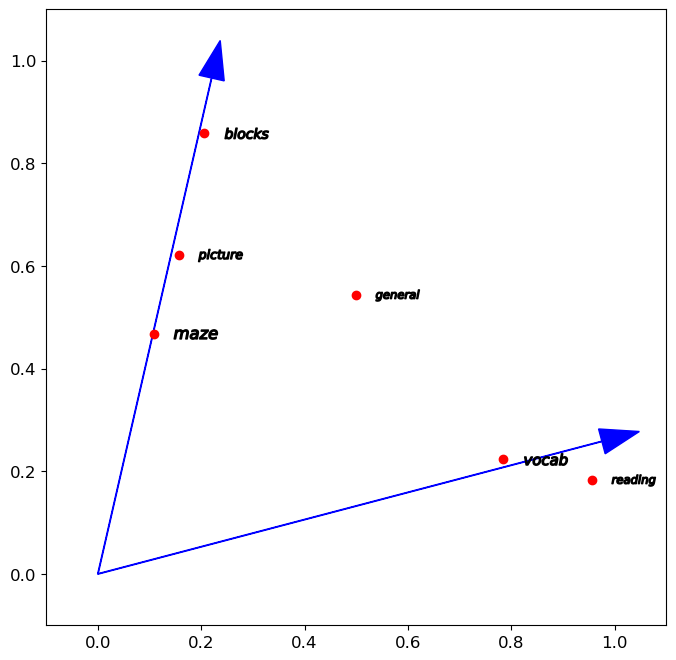

In [27]:
## Rotation
rotator = Rotator(method='oblimin')
rotator.fit(fa.loadings_)

## loadings에 대한 scatter plot 및 rotation에 대한 arrow plot
markers = ['$general$', '$picture$', '$blocks$', '$maze$', '$reading$', '$vocab$']

plt.figure(figsize=(8,8))
plt.arrow(0, 0, rotator.rotation_[0,0], rotator.rotation_[0,1], head_width=0.05, color='blue')
plt.arrow(0, 0, rotator.rotation_[1,0], rotator.rotation_[1,1], head_width=0.05, color='blue')
plt.scatter(fa.loadings_[:,0], fa.loadings_[:,1], color='red')
for i, marker in enumerate(markers):
    plt.scatter(fa.loadings_[i,0]+0.08, fa.loadings_[i,1], [1000], marker=marker, color='black')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)

## 11.4 Discrete multivariate analysis

- **Mosaic Plot for caith data**

In [28]:
## Caith data
caith = pd.read_csv("../data/caith.csv", index_col=0)

caith_dict = {}
caith_columns = list(caith.columns)
caith_index = list(caith.index)
for i in range(20):
    caith_dict[(caith_index[i//5], caith_columns[4-i%5])] = caith.iloc[i//5, 4-i%5]

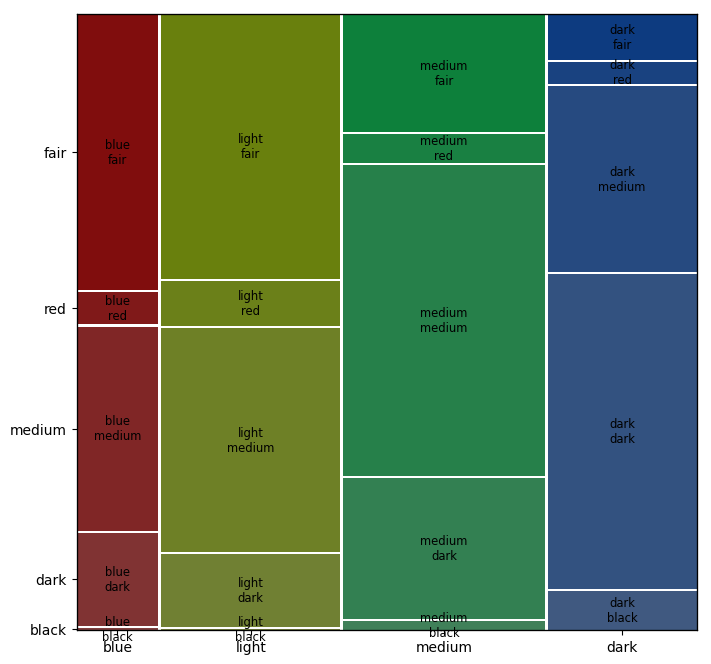

In [29]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

## caith에 대한 mosaic plot
plt.style.use('default')
plt.rcParams.update({'figure.figsize': (8, 8)})
plt.rcParams.update({'font.size': 10})
mosaic(caith_dict)
plt.show()

- **Mosaic Plot for housing data**

In [30]:
## Housing data
housing = pd.read_csv("../data/housing.csv")

housing_dict = {}
housing_sat = ['Low','Medium','High']
housing_infl = ['Low','Medium','High']
housing_type = ['Tower','Apartment','Atrium','Terrace']
housing_cont = ['Low', 'High']
for i in range(72):
    housing_dict[((housing_type[(i//9)%4], housing_cont[(i//36)%2]), (housing_sat[i%3], housing_infl[(i//3)%3]))] = housing.iloc[i, 4]    

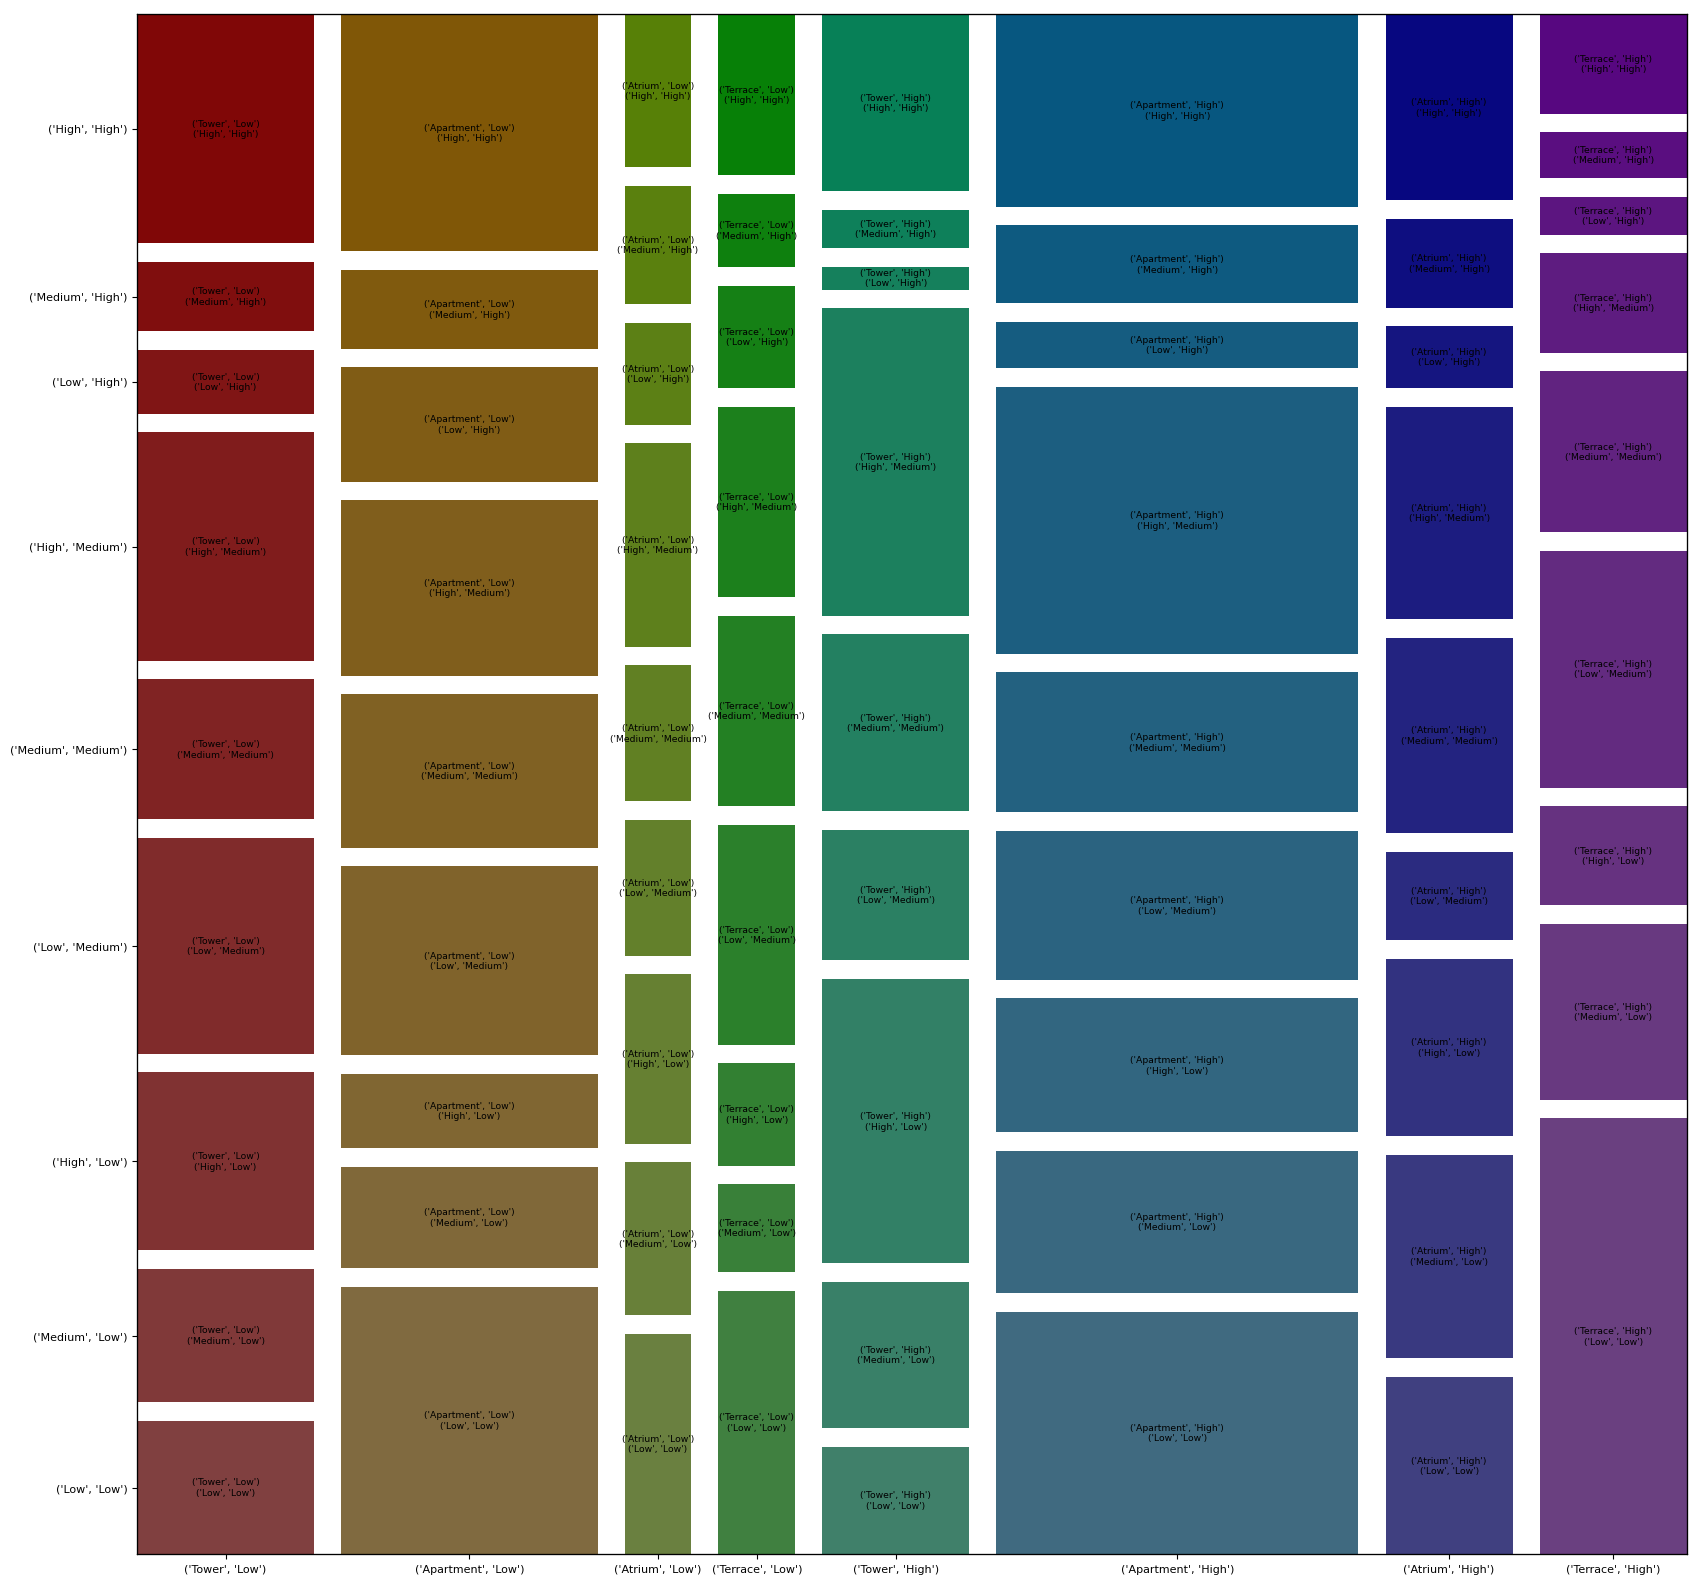

In [31]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

## housing에 대한 mosaic plot
plt.style.use('default')
plt.rcParams.update({'figure.figsize': (20, 20)})
plt.rcParams.update({'font.size': 8})
mosaic(housing_dict, gap = 0.02)
plt.show()

- **Correspondence analysis for caith data**

(-0.7, 1.2)

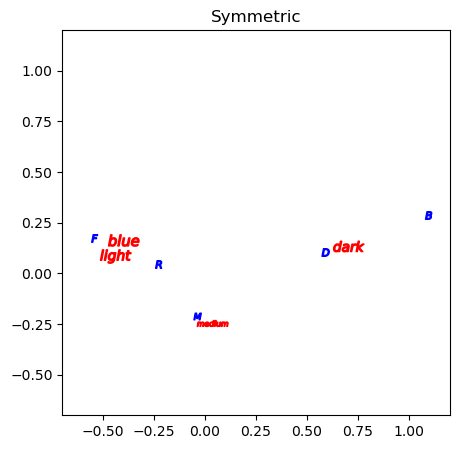

In [32]:
# pip install prince
from prince import CA

## correspondence analysis for caith
caith_ca = CA(n_components=2, n_iter=3).fit(caith)

row_coord = caith_ca.row_coordinates(caith)
row_coord.loc[:,1] = -row_coord.loc[:,1]
col_coord = caith_ca.column_coordinates(caith)
col_coord.loc[:,1] = -col_coord.loc[:,1]

## CA plot(symmetric)
plt.style.use('default')
plt.rcParams["figure.figsize"]=(5, 5)
for i, marker in enumerate(['$blue$','$light$','$medium$','$dark$']):
    plt.scatter(row_coord.iloc[i,0], row_coord.iloc[i,1], 500, marker=marker, color='red')

for i, marker in enumerate(['$F$','$R$','$M$','$D$','$B$']):
    plt.scatter(col_coord.iloc[i,0], col_coord.iloc[i,1], 30, marker=marker, color='blue')
    
plt.title('Symmetric')
plt.xlim(-0.7, 1.2)
plt.ylim(-0.7, 1.2)

In [33]:
# R에 내장된 plot 함수에 type 지정이 없으므로 [type = 'row' or 'column'] 그림은 생략

- **Multiple Correspondence analysis for farms data**

In [34]:
## Farms data
farms = pd.read_csv("../data/farms.csv")

(-1.7, 1.7)

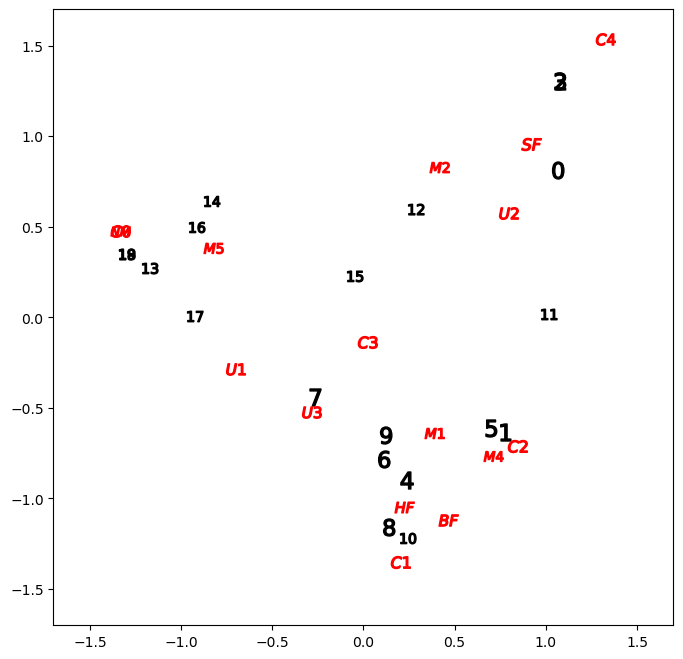

In [35]:
from prince import MCA

## MCA for farms data
farms_mca = MCA().fit(farms)


## MCA plot
row_coord = farms_mca.row_coordinates(farms)
row_coord.loc[:,0] = -row_coord.loc[:,0]
col_coord = farms_mca.column_coordinates(farms)
col_coord.loc[:,0] = -col_coord.loc[:,0]

plt.style.use('default')
plt.rcParams["figure.figsize"]=(8, 8)
for i, marker in enumerate(['$'+str(text)+'$' for text in row_coord.index]):
    plt.scatter(row_coord.iloc[i,0], row_coord.iloc[i,1], 150, marker=marker, color='black')

for i, marker in enumerate(['$'+text[-2:]+'$' for text in col_coord.index]):
    plt.scatter(col_coord.iloc[i,0], col_coord.iloc[i,1], 200, marker=marker, color='red')
    
plt.xlim(-1.7, 1.7)
plt.ylim(-1.7, 1.7)